In [1]:
import pandas as pd  # Importing Pandas library
import seaborn as sns  # Importing Seaborn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv("Staphylococcus_aureus_Infection_Data.csv")
#predict 30 day death

In [3]:
data #displaying data

,Unnamed: 0,AGE_GRP,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
0,101,71-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.161033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,102,51-60,False,False,False,False,False,False,0.0,0.216912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,51-60,False,False,False,False,False,False,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,71-80,True,True,True,True,True,True,4.0,0.224415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,61-70,False,False,False,False,False,False,5.0,-0.080960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,8087,00-10,False,False,False,False,False,False,0.0,0.191297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6183,8088,51-60,False,False,False,False,False,False,0.0,-0.091525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6184,8089,61-70,False,False,True,True,True,True,9.0,0.131185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6185,8090,00-10,False,False,False,False,False,False,0.0,-0.034182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info() #getting information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Columns: 2102 entries, Unnamed: 0 to Protein 2093
dtypes: float64(2094), int64(1), object(7)
memory usage: 99.2+ MB


In [5]:
data.describe()

,Unnamed: 0,Charlson_WIC,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,Protein 8,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
count,6187.000000,5571.000000,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,6187.000000,...,6187.000000,6.187000e+03,6187.000000,6187.000000,6.187000e+03,6187.000000,6187.000000,6.187000e+03,6187.0,6187.0
mean,4129.534185,1.988512,-0.003591,-0.008459,-0.006781,-0.001553,-0.011327,0.001378,-0.002793,0.000579,...,0.000239,5.383335e-20,-0.000799,0.000091,-5.297270e-07,-0.000178,-0.000040,7.177779e-20,0.0,0.0
std,2348.610567,2.263728,0.258684,0.512503,0.359131,0.215862,0.419648,0.223023,0.146585,0.335828,...,0.074731,3.825195e-02,0.049149,0.014026,3.683535e-02,0.049907,0.058472,5.205953e-02,0.0,0.0
min,101.000000,0.000000,-1.473629,-1.738538,-1.612095,-2.258909,-3.980809,-1.747912,-0.767014,-1.957778,...,-0.828241,-8.518873e-01,-2.132325,-0.703349,-8.601446e-01,-0.901065,-1.848786,-1.209112e+00,0.0,0.0
25%,2026.500000,0.000000,-0.075127,-0.320576,-0.229494,-0.111957,-0.228181,-0.120550,-0.084378,-0.223116,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0
50%,4214.000000,1.000000,0.000000,-0.077359,-0.054659,-0.002432,0.000000,0.013629,-0.010573,-0.051183,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0
75%,6187.500000,3.000000,0.130298,0.167070,0.133263,0.112686,0.191996,0.131006,0.063730,0.197265,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0
max,8091.000000,13.000000,2.162580,2.087166,1.468049,1.364564,3.797873,1.753341,1.689358,1.561666,...,4.602536,2.116791e+00,1.208889,0.555942,2.634659e+00,2.893525,2.797642,3.734154e+00,0.0,0.0


In [6]:
#Dropping blank data
data = data.dropna()

In [7]:
#converting AGE_GRP column
AGE_GRP = data.iloc[:,1]
age_grp = []
for i in AGE_GRP:
    if i == "00-10":
        age_grp.append(0)
    elif i == "11-20":
        age_grp.append(10)
    elif i == "21-30":
        age_grp.append(20)
    elif i == "31-40":
        age_grp.append(30)
    elif i == "41-50":
        age_grp.append(40)
    elif i == "51-60":
        age_grp.append(50)
    elif i == "61-70":
        age_grp.append(60)
    elif i == "71-80":
        age_grp.append(70)
    else:
        age_grp.append(80)
        
data.iloc[:,1] = age_grp

data

C:\Users\miche\AppData\Local\Temp\ipykernel_33424\4273078052.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,1] = age_grp


,Unnamed: 0,AGE_GRP,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,102,50,False,False,False,False,False,False,0.0,0.216912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,50,False,False,False,False,False,False,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,70,True,True,True,True,True,True,4.0,0.224415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,60,False,False,False,False,False,False,5.0,-0.080960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,109,50,False,False,False,False,False,False,1.0,0.013984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,8087,0,False,False,False,False,False,False,0.0,0.191297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6183,8088,50,False,False,False,False,False,False,0.0,-0.091525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6184,8089,60,False,False,True,True,True,True,9.0,0.131185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6185,8090,0,False,False,False,False,False,False,0.0,-0.034182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
x = data.drop(["ThirtyDay_Death", "Unnamed: 0", "SixWeek_Death", "ThreeMo_Death", "SixMo_Death", "NineMo_Death", "OneYear_Death"], axis=1)
y = data["ThirtyDay_Death"].astype(object).astype(int)

#selecting the best 20 features
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=20)
x = selector.fit_transform(x, y) #new x with the best features 

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

C:\Users\miche\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [2093 2094] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [9]:
# apply random oversampling to the minority class
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [10]:
# create an LDA object
lda = LDA()

# fit the LDA model to the training data
lda.fit(x_train_resampled, y_train_resampled)

LinearDiscriminantAnalysis()

In [11]:
#making a prediction
y_pred_train = lda.predict(x_train)
y_pred_test = lda.predict(x_test)


0.6481195260175168


<AxesSubplot:>

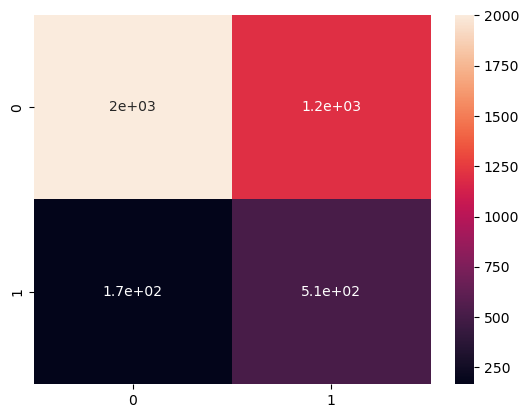

In [12]:
#Testing Accuracy of training data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_train, y_pred_train)

print(accuracy_score(y_train, y_pred_train))

sns.heatmap(cm, annot=True)

0.66006006006006


<AxesSubplot:>

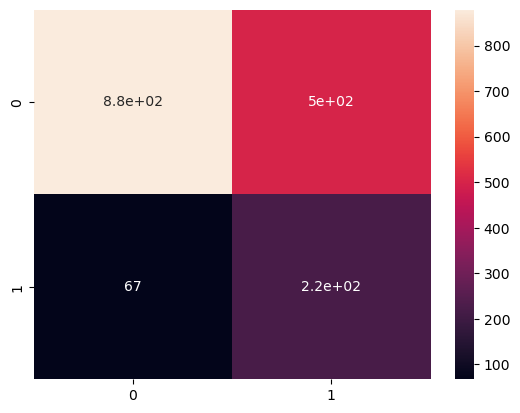

In [13]:
#Testing Accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_test)

print(accuracy_score(y_test, y_pred_test))

sns.heatmap(cm, annot=True)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Extract the true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Compute the sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the classification report
print(classification_report(y_test, y_pred_test))

# Print the sensitivity and specificity
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1378
           1       0.31      0.77      0.44       287

    accuracy                           0.66      1665
   macro avg       0.62      0.70      0.60      1665
weighted avg       0.82      0.66      0.70      1665

Sensitivity: 0.7665505226480837
Specificity: 0.6378809869375908
